## 부산시 다회용컵 수거함 사업 참여 지역 및 수거함 위치 제안  

### 부산 구역별 연간매출 합계 구해서 folium 그리기

### 데이터 전처리

In [1]:
# 필요한 라이브러리 import
import json
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import rcParams, style, font_manager, rc
import matplotlib.pyplot as plt
import matplotlib as mpl

import folium
from folium.plugins import MarkerCluster

In [2]:
# 한글폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [3]:
# 상권 데이터 불러와서 확인
price = pd.read_csv('./data/부산시_상권매출정보.csv', encoding='utf-8')
price.head()

,Unnamed: 0,상권 NO.,상권명,연간매출(현대카드)/원,분석정보(2020년 기준)
0,0,9449.0,부산광역시 금정구 구서동역,"285,718,662,364",[상세보기]
1,1,9479.0,부산광역시 기장군 기장읍,"97,076,470,530",[상세보기]
2,2,9478.0,부산광역시 기장군 기장역,"104,111,370,029",[상세보기]
3,3,9441.0,부산광역시 북구 화명역_2,"155,225,010,490",[상세보기]
4,4,9440.0,부산광역시 북구 화명역_1,"194,040,441,135",[상세보기]


In [4]:
# 데이터 변수형 정보 확인
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      90 non-null     int64  
 1   상권 NO.          90 non-null     float64
 2   상권명             90 non-null     object 
 3   연간매출(현대카드)/원    90 non-null     object 
 4   분석정보(2020년 기준)  90 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 3.6+ KB


In [5]:
# 컬럼명 변경
price = price.rename(columns={'연간매출(현대카드)/원':'금액'})
price.head()

,Unnamed: 0,상권 NO.,상권명,금액,분석정보(2020년 기준)
0,0,9449.0,부산광역시 금정구 구서동역,"285,718,662,364",[상세보기]
1,1,9479.0,부산광역시 기장군 기장읍,"97,076,470,530",[상세보기]
2,2,9478.0,부산광역시 기장군 기장역,"104,111,370,029",[상세보기]
3,3,9441.0,부산광역시 북구 화명역_2,"155,225,010,490",[상세보기]
4,4,9440.0,부산광역시 북구 화명역_1,"194,040,441,135",[상세보기]


In [6]:
# 금액의 값이 너무 커서 십억부터 계산하기위해 금액 값을 다른 컬럼으로 잘라내는 과정 (단위: 십억)
price['금액1'] = price['금액'].str.split(',').str[0]
price.head()

,Unnamed: 0,상권 NO.,상권명,금액,분석정보(2020년 기준),금액1
0,0,9449.0,부산광역시 금정구 구서동역,"285,718,662,364",[상세보기],285
1,1,9479.0,부산광역시 기장군 기장읍,"97,076,470,530",[상세보기],97
2,2,9478.0,부산광역시 기장군 기장역,"104,111,370,029",[상세보기],104
3,3,9441.0,부산광역시 북구 화명역_2,"155,225,010,490",[상세보기],155
4,4,9440.0,부산광역시 북구 화명역_1,"194,040,441,135",[상세보기],194


In [7]:
# 금액1 컬럼을 문자형에서 정수형으로 변경
price['금액1'] = price['금액1'].astype(int)
price.head()

,Unnamed: 0,상권 NO.,상권명,금액,분석정보(2020년 기준),금액1
0,0,9449.0,부산광역시 금정구 구서동역,"285,718,662,364",[상세보기],285
1,1,9479.0,부산광역시 기장군 기장읍,"97,076,470,530",[상세보기],97
2,2,9478.0,부산광역시 기장군 기장역,"104,111,370,029",[상세보기],104
3,3,9441.0,부산광역시 북구 화명역_2,"155,225,010,490",[상세보기],155
4,4,9440.0,부산광역시 북구 화명역_1,"194,040,441,135",[상세보기],194


In [8]:
# 필요한 상권명, 금액1 컬럼만 추출하여 price1 으로 저장
price1 = price[['상권명', '금액1']]
price1.head()

,상권명,금액1
0,부산광역시 금정구 구서동역,285
1,부산광역시 기장군 기장읍,97
2,부산광역시 기장군 기장역,104
3,부산광역시 북구 화명역_2,155
4,부산광역시 북구 화명역_1,194


In [9]:
# 상권명 컬럼에서 지역 컬럼을 만들어 구 단위 추출하여 저장
price1['지역'] = price1['상권명'].str.split(' ').str[1]
price1.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_6024\3621377040.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price1['지역'] = price1['상권명'].str.split(' ').str[1]


,상권명,금액1,지역
0,부산광역시 금정구 구서동역,285,금정구
1,부산광역시 기장군 기장읍,97,기장군
2,부산광역시 기장군 기장역,104,기장군
3,부산광역시 북구 화명역_2,155,북구
4,부산광역시 북구 화명역_1,194,북구


In [10]:
# 구역별 가공된 금액1 의 합계를 구하기
price2 = price1.groupby('지역')['금액1'].sum()
price2

지역
금정구      729
기장군      201
남구      1079
동구      1216
동래구     1402
부산진구    2551
북구       838
사상구     1027
사하구     1097
수영구      755
연제구     1497
영도구      262
중구      2004
해운대구    4018
Name: 금액1, dtype: int32

In [11]:
# 가공된 price2 - csv파일 저장
price2.to_csv('./data/shop_price.csv', index=True, encoding='utf-8')

### 그래프 그리기

#### barchar 구현

In [12]:
# 저장된 price2.csv 불러오기
total_price = pd.read_csv('./data/shop_price.csv', encoding='utf-8')
total_price

,지역,금액1
0,금정구,729
1,기장군,201
2,남구,1079
3,동구,1216
4,동래구,1402
5,부산진구,2551
6,북구,838
7,사상구,1027
8,사하구,1097
9,수영구,755


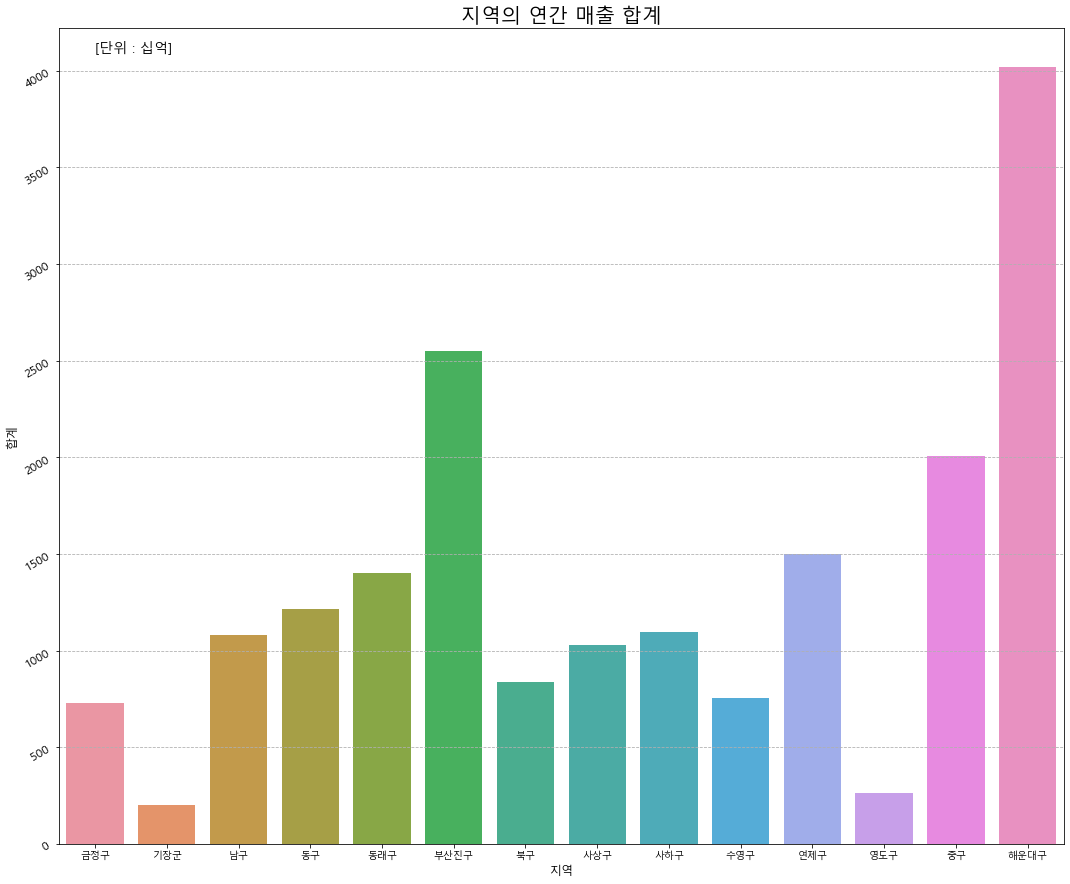

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(18,15)

sns.barplot(data = total_price, x = '지역', y='금액1')
ax.set_title('지역의 연간 매출 합계', size = 20) # 타이틀 옵션
ax.set_xlabel('지역', size = 12) # x축 제목 크기 조절
ax.set_ylabel('합계', size = 12) # y축 제목 크기 조절
ax.tick_params(axis='y', labelsize = 12, labelrotation = 30) # y축 눈금 크기 조절 + 회전

plt.annotate('[단위 : 십억]', (0.0,4100), size = 14) # 표에 데이터 삽입
plt.grid(True, axis='y', linestyle='--') # 눈금선 그리드 표시

plt.show()

#### json 으로 행정구역을 나누어 folium 사용

In [14]:
# json 불러오기
geo_path = './data/busan_gu.json'

geo_json = json.load(open(geo_path, encoding='utf-8'))

In [15]:
geo_json['features'][0]['properties']['name']

'중구'

In [16]:
lat = 35.181784
long = 129.052852

In [17]:
# folium 사용하여 연간 매출액 표현
# 원본데이터에 강서구, 서구 값이 없어서 검정색으로 나타남

map = folium.Map([lat, long])

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=total_price,
    columns=['지역', '금액1'],
    key_on='feature.properties.name',
    fill_color='RdPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='연간 매출액 [단위 : 십억]'
).add_to(map)

map